# 1- Support Vector Machine

In [2]:
from IPython.display import IFrame    
IFrame('https://mljs.github.io/libsvm/#/SVC', width=800, height=800)

In [6]:
# Load the dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [7]:
# Scale images from [0,255] to [0,1]
x_train_normalized = x_train / 255.0

In [8]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib nbagg
# %matplotlib ipympl
# %matplotlib notebook

In [9]:
import numpy as np
# Sample a smaller dataset for testing
rand_idx = np.random.choice(x_train.shape[0], 10000)
x_train = x_train_normalized[rand_idx]
y_train = y_train[rand_idx]
print('** What is the shape of your dataset? **')

(10000, 28, 28)

In [10]:
# Support Vector Machine
from sklearn import svm, metrics
# Create a Support Vector Classifier with the Defaults Scikit-Learn hyperparameters
clf = '** Add your code here **'
print('We have create an SVM Classifier with parameters:')
print(clf)

We have create an SVM Classifier with parameters:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [11]:
%time clf.fit(x_train.reshape(-1, 28 * 28), y_train)

CPU times: user 34.5 s, sys: 139 ms, total: 34.6 s
Wall time: 34.8 s


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
# Validate the model performance: predict the classified digit from the test dataset
%time y_predicted = clf.predict(x_test.reshape(-1, 28 * 28))

CPU times: user 43.7 s, sys: 185 ms, total: 43.9 s
Wall time: 44.7 s


In [13]:
# What we should have predicted:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [14]:
# What we have predicted with our model:
y_predicted

array([2, 2, 2, ..., 2, 2, 2], dtype=uint8)

In [15]:
print("Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, y_predicted)))
cm = metrics.confusion_matrix(y_test, y_predicted)
print("Confusion matrix:\n%s" % cm)

print("Accuracy={}".format(metrics.accuracy_score(y_test, y_predicted)))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.00      0.00      0.00      1135
           2       0.10      1.00      0.19      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

   micro avg       0.10      0.10      0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10 

/Users/Pierre/.virtualenvs/DeepQC/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


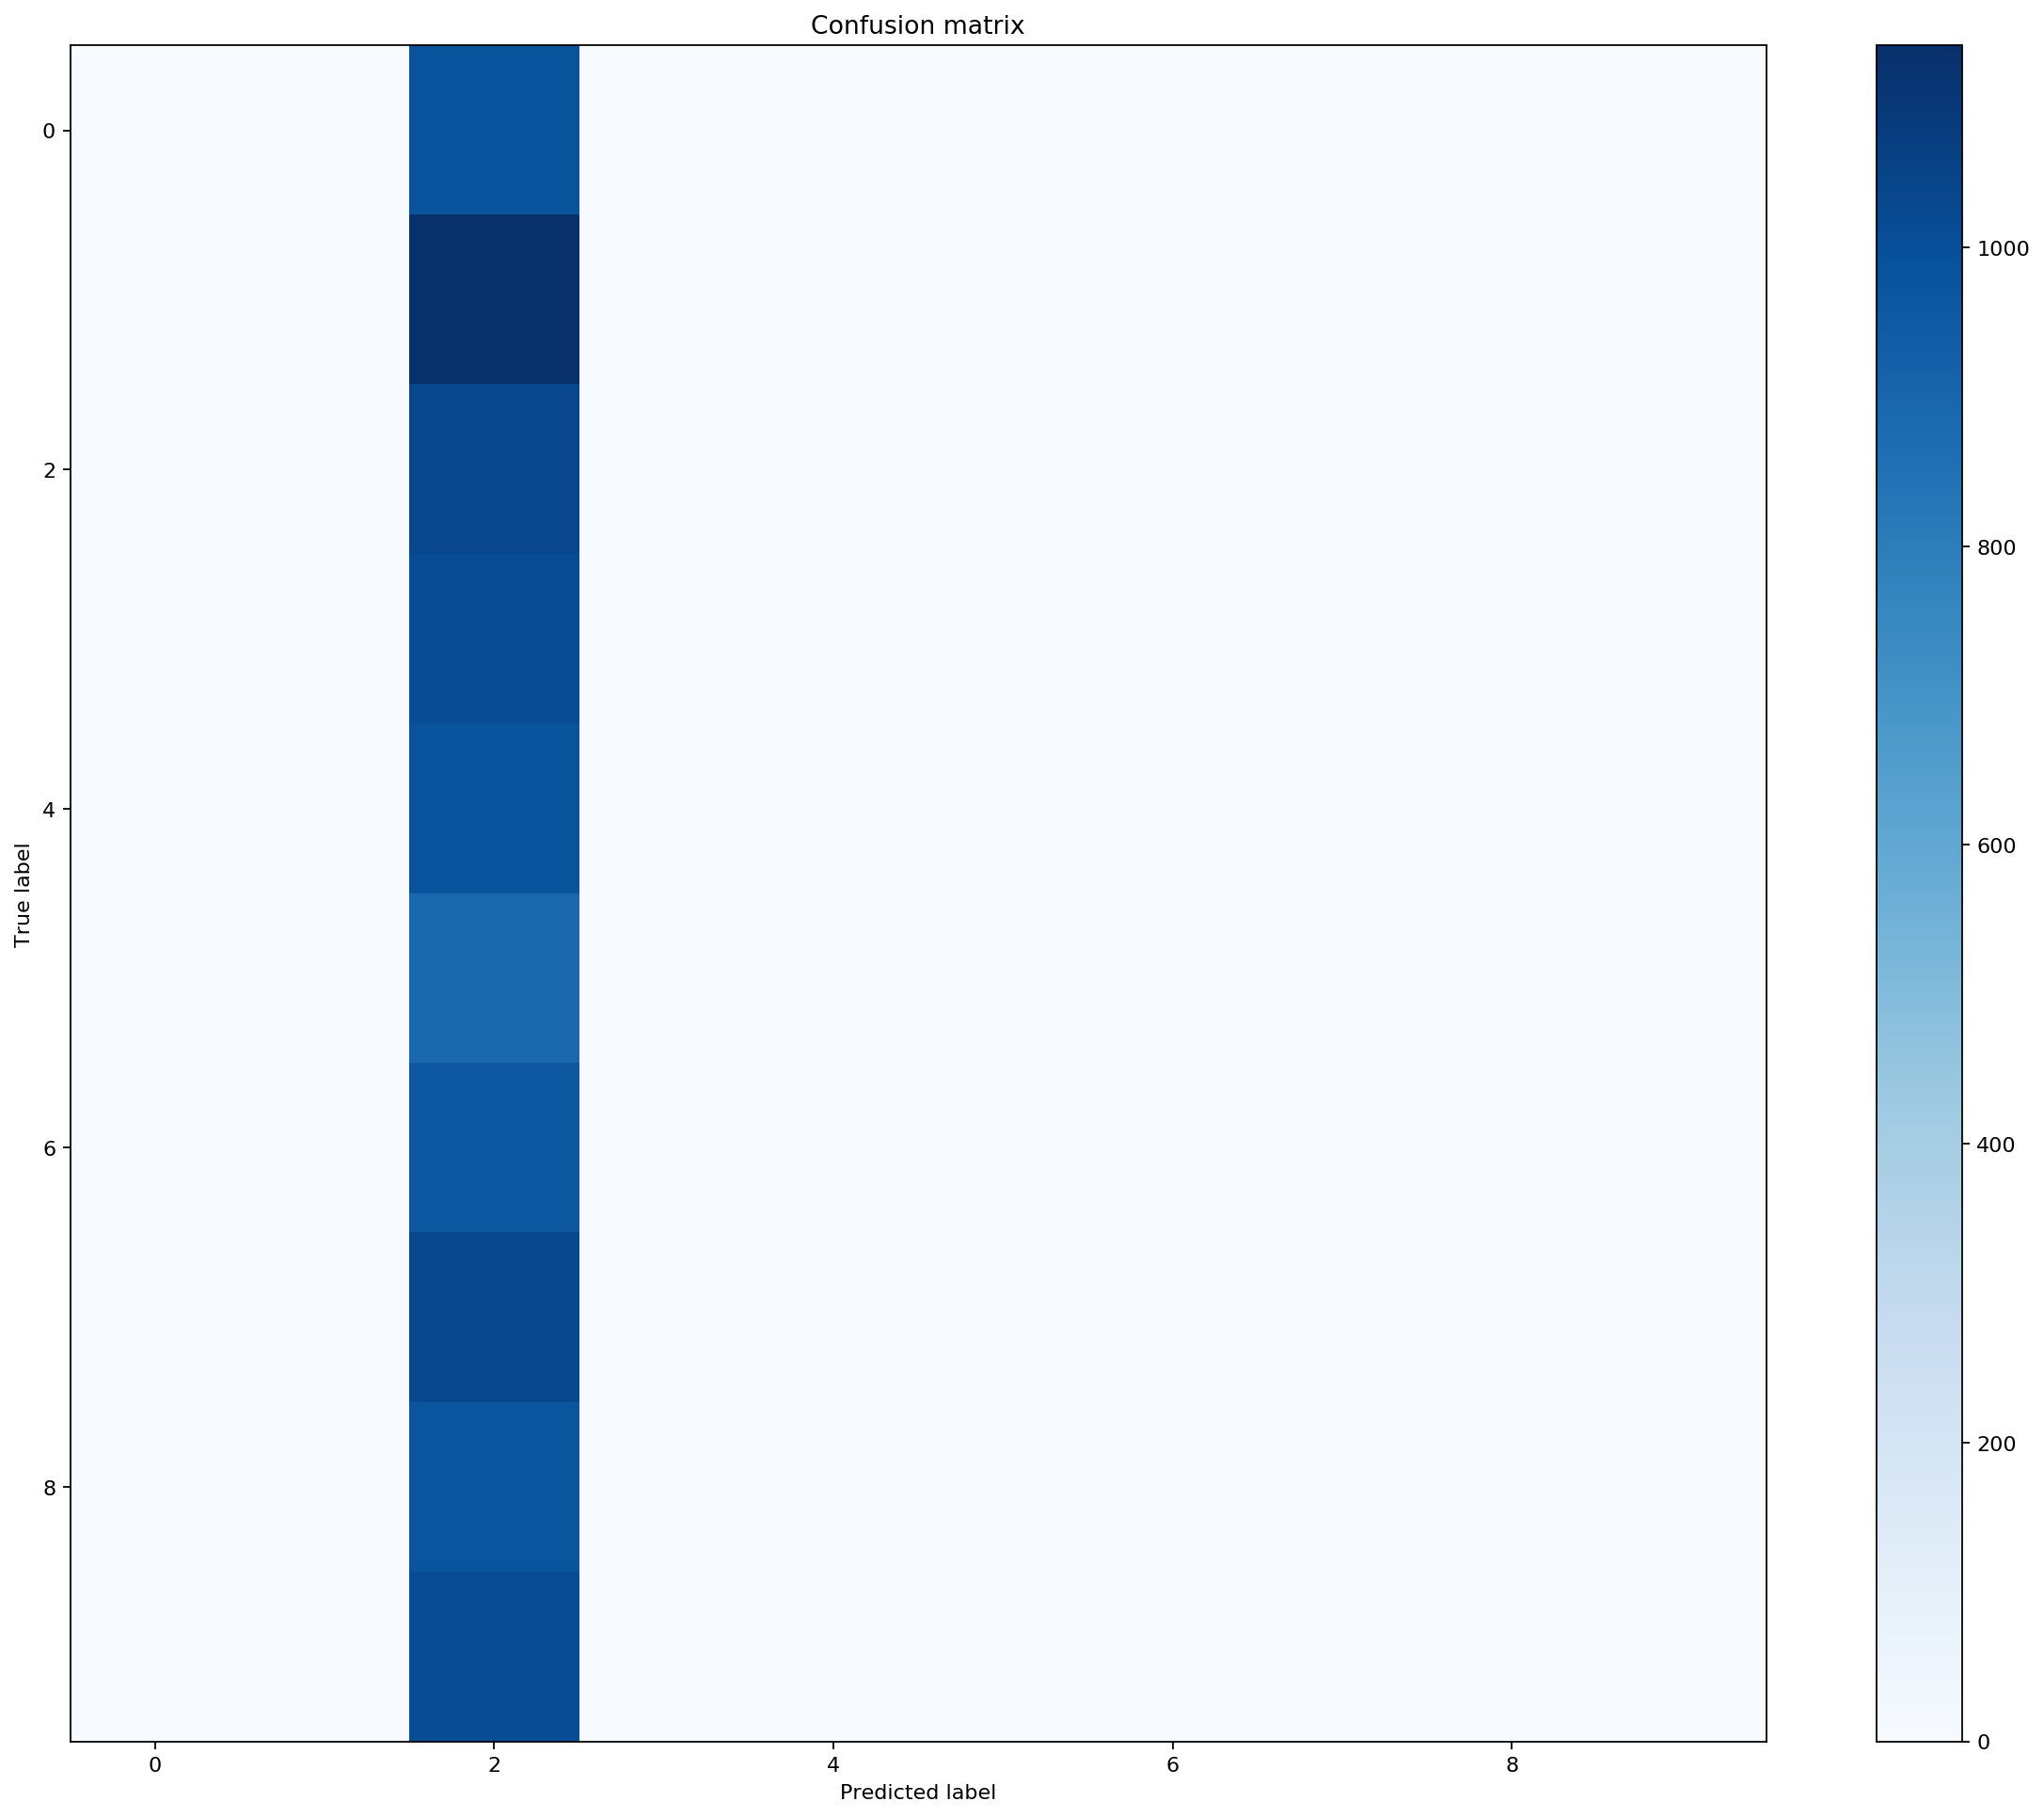

In [16]:
#Plots confusion matrix
def plot_confusion_matrix(cm, title='Confusion matrix'):
    plt.figure(1, figsize=(15, 12), dpi=160)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')  
    plt.show()

plot_confusion_matrix(cm)

# 2- Hyperparameters tuning: classify better and faster

In [17]:
# Hyperparameters tuning: better and faster
clf_faster = '** Add your code here **'  # Faster with linear kernel + handtuned C and gamma
print('We have create a faster SVM Classifier with parameters:')
print(clf_faster)

We have create a faster SVM Classifier with parameters:
SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [18]:
%time clf_faster.fit(x_train.reshape(-1, 28 * 28), y_train)

CPU times: user 12.1 s, sys: 58.9 ms, total: 12.2 s
Wall time: 12.5 s


SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
# Validate the model performance: predict the classified digit from the test dataset
%time y_predicted = clf_faster.predict(x_test.reshape(-1, 28 * 28))
y_predicted

CPU times: user 20.1 s, sys: 81.2 ms, total: 20.2 s
Wall time: 20.8 s


array([3, 2, 1, ..., 4, 8, 6], dtype=uint8)

Classification report for classifier SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       980
           1       0.97      0.83      0.90      1135
           2       0.93      0.79      0.85      1032
           3       0.79      0.82      0.81      1010
           4       0.86      0.96      0.91       982
           5       1.00      0.26      0.42       892
           6       0.90      0.94      0.92       958
           7       0.98      0.79      0.88      1028
           8       0.52      0.97      0.68       974
           9       0.86      0.86      0.86      1009

   micro avg       0.83      0.83      0.83     10000
   macro avg       0.87      0.82      0.81     10000
weighted avg       0.87      0.83 

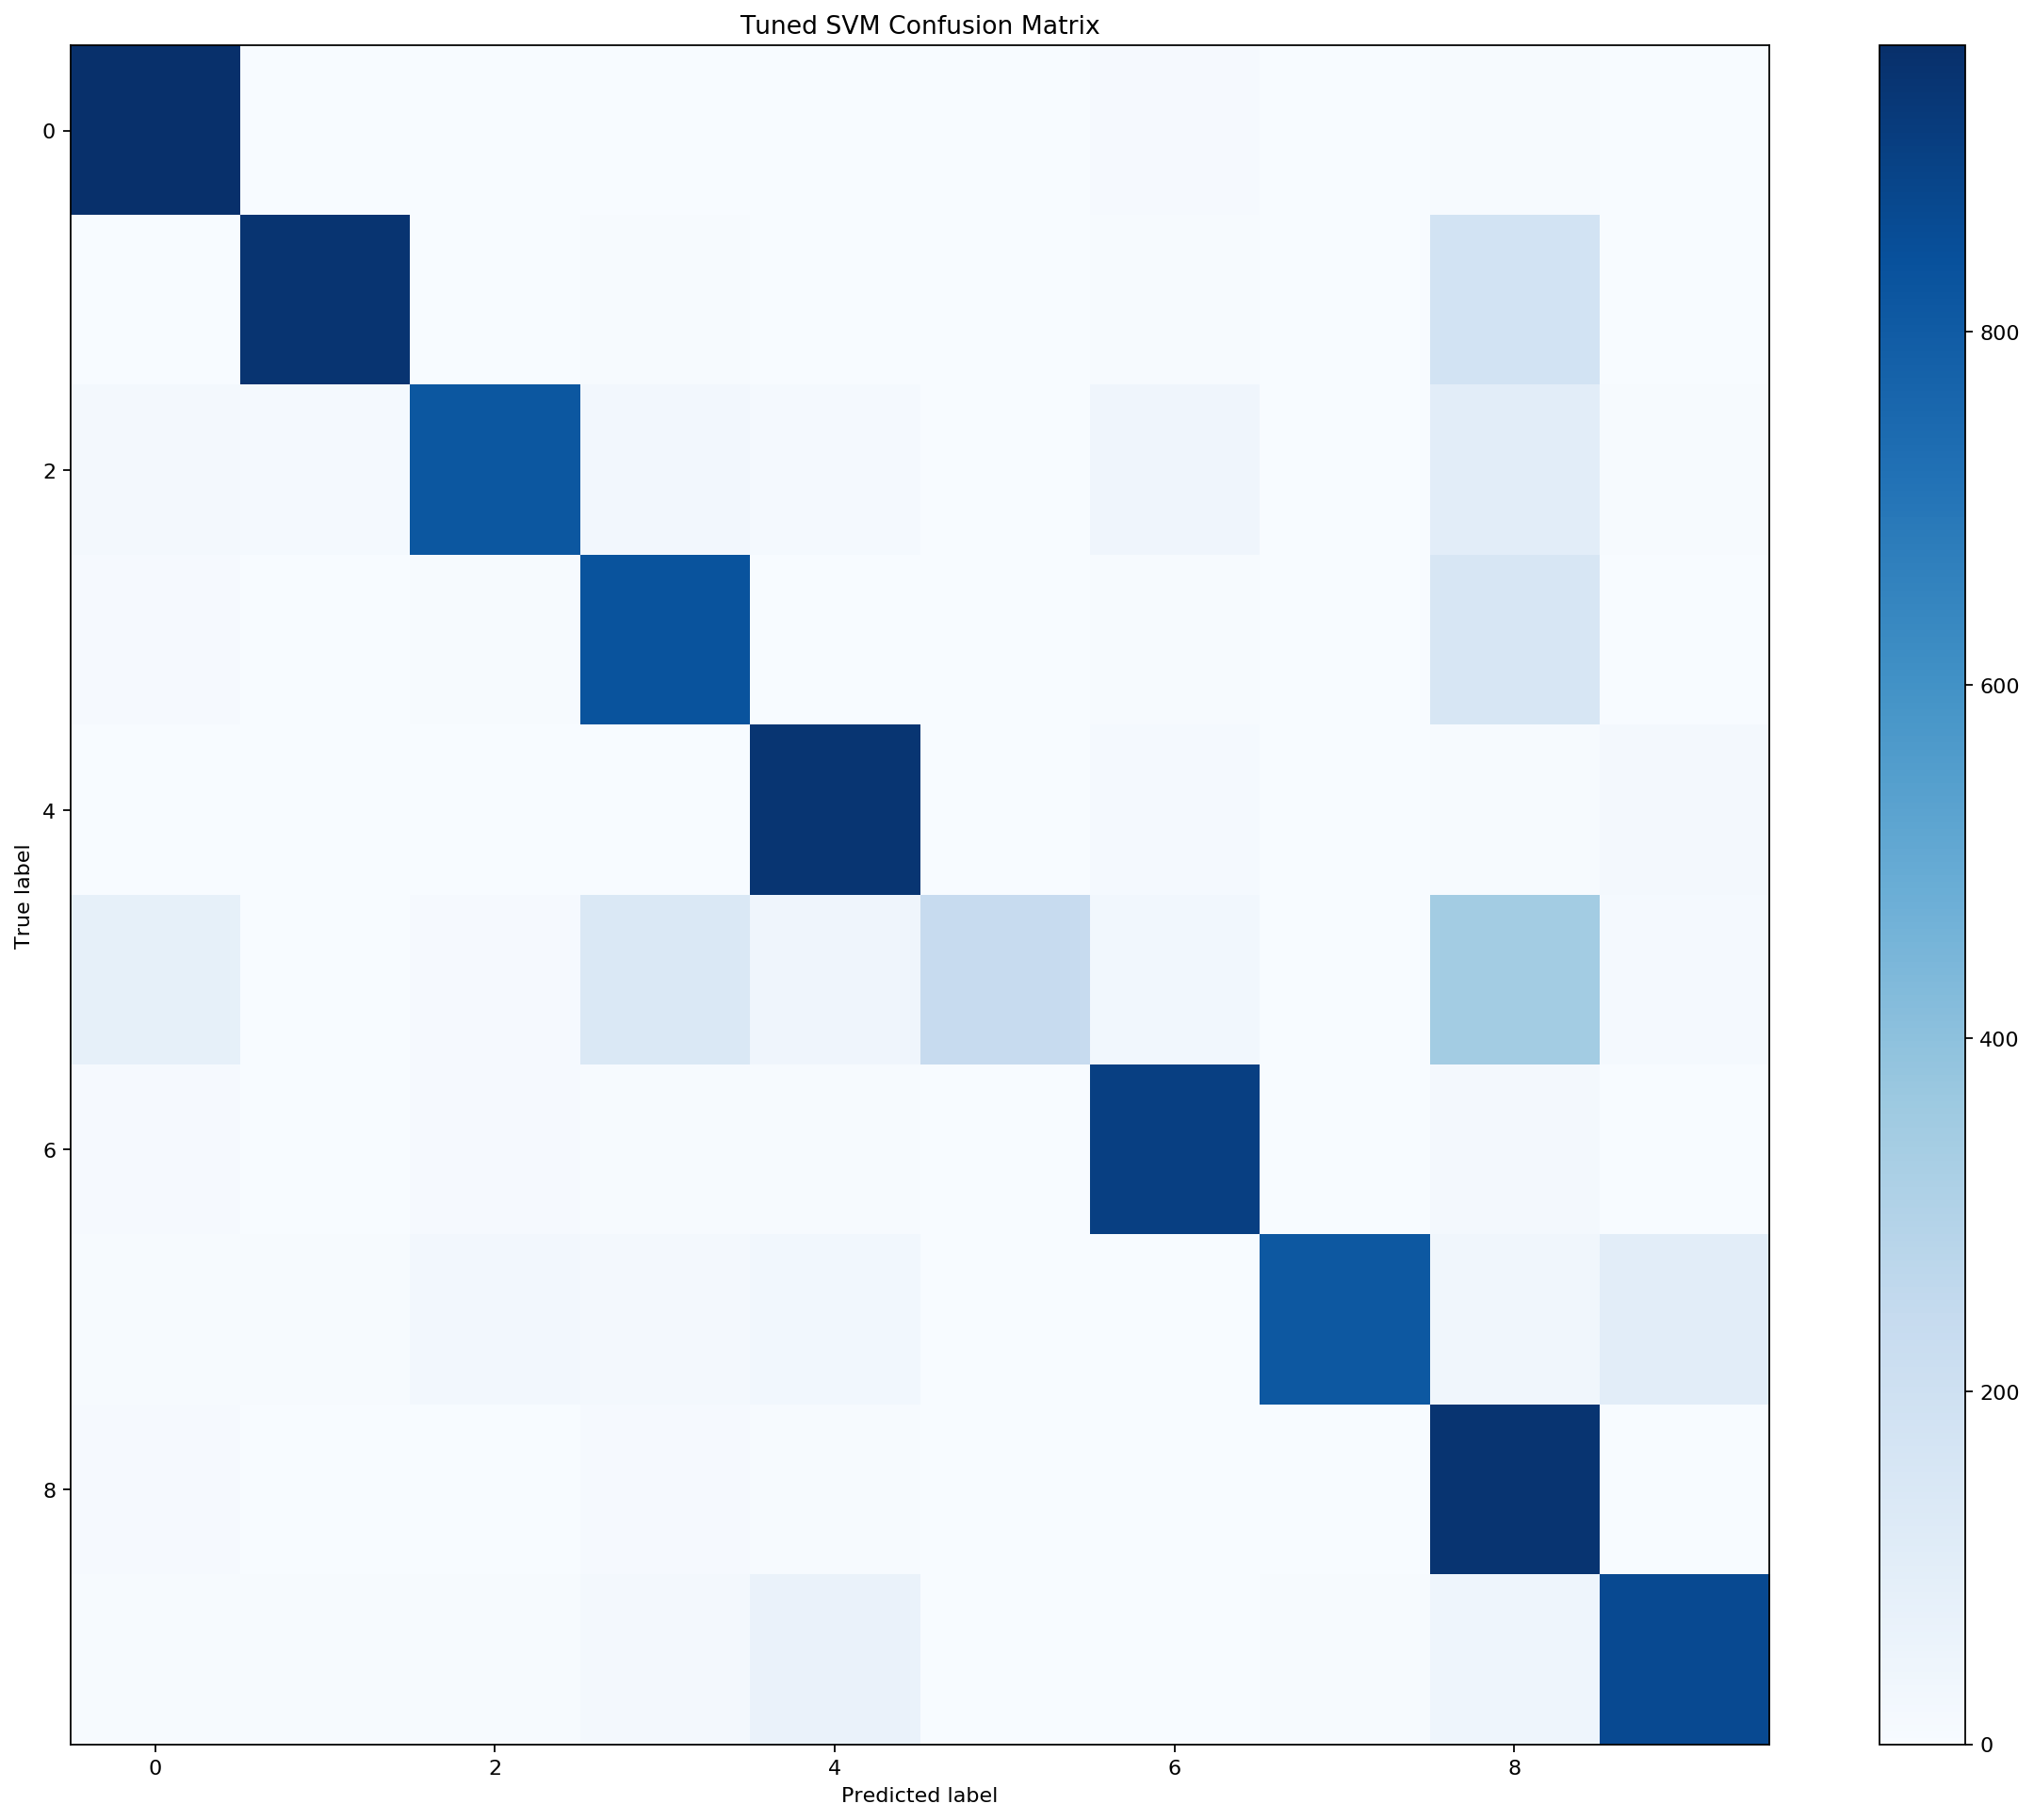

In [20]:
print("Classification report for classifier %s:\n%s\n" % (clf_faster, metrics.classification_report(y_test, y_predicted)))
cm = metrics.confusion_matrix(y_test, y_predicted)
print("Confusion matrix:\n%s" % cm)

print("Accuracy={}".format(metrics.accuracy_score(y_test, y_predicted)))
plot_confusion_matrix(cm, title='Tuned SVM Confusion Matrix')

# 3- Information reduction: Principal Component Analysis
Could we extract the minimal needed information from the input data, before running the costly classifier?

In [21]:
from sklearn.decomposition import PCA
# Let's embedded 28 * 28 = 784 pixels as only 2 dimensions:
pca_2D = '** Add your code here **'
x_train_2D = pca_2D.transform(x_train.reshape(-1, 28 * 28))
x_train_2D.shape

(10000, 2)

In [22]:
pca_2D.explained_variance_ratio_

array([0.09665204, 0.06986566])

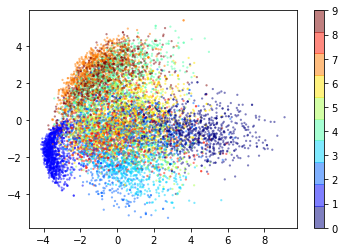

In [23]:
plt.scatter(x_train_2D[:, 0], x_train_2D[:, 1], c=y_train[:], edgecolor='none', alpha=0.5,
           cmap=plt.get_cmap('jet', 10), s=5)
plt.colorbar()

In [24]:
# Embedded images in 10 dimensions:
pca_10D = '** Add your code here **'.fit(x_train.reshape(-1, 28 * 28))
pca_10D

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [30]:
pca_10D.explained_variance_ratio_

array([0.09665204, 0.06986566, 0.06246802, 0.05519677, 0.04828766,
       0.04332001, 0.03256506, 0.0292913 , 0.02727743, 0.02342807])

In [26]:
sum(pca_10D.explained_variance_ratio_)

0.48835202138877953

Text(0, 0.5, 'Cumulative explained variance')

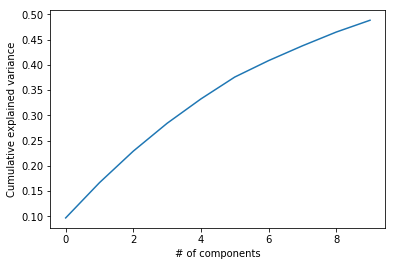

In [31]:
plt.plot(np.cumsum(pca_10D.explained_variance_ratio_))
plt.xlabel('# of components')
plt.ylabel('Cumulative explained variance')

In [32]:
x_train_reduced = pca_10D.transform(x_train.reshape(-1, 28 * 28))
print('What is the dimension of X_train_reduced?')

(10000, 10)

In [33]:
%time clf_faster.fit(x_train_reduced, y_train)

CPU times: user 2.67 s, sys: 15.6 ms, total: 2.69 s
Wall time: 2.69 s


SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
# Validate the model performance: predict the classified digit from the test dataset
%time y_predicted = clf_faster.predict(pca_10D.transform(x_test.reshape(-1, 28 * 28)))
y_predicted

CPU times: user 973 ms, sys: 88.6 ms, total: 1.06 s
Wall time: 675 ms


array([7, 3, 1, ..., 4, 8, 6], dtype=uint8)

Classification report for classifier SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.71      0.96      0.82       980
           1       0.99      0.74      0.84      1135
           2       0.83      0.80      0.81      1032
           3       0.75      0.74      0.75      1010
           4       0.80      0.61      0.69       982
           5       0.88      0.02      0.05       892
           6       0.89      0.85      0.87       958
           7       0.96      0.71      0.82      1028
           8       0.36      0.95      0.52       974
           9       0.61      0.49      0.54      1009

   micro avg       0.69      0.69      0.69     10000
   macro avg       0.78      0.69      0.67     10000
weighted avg       0.78      0.69 

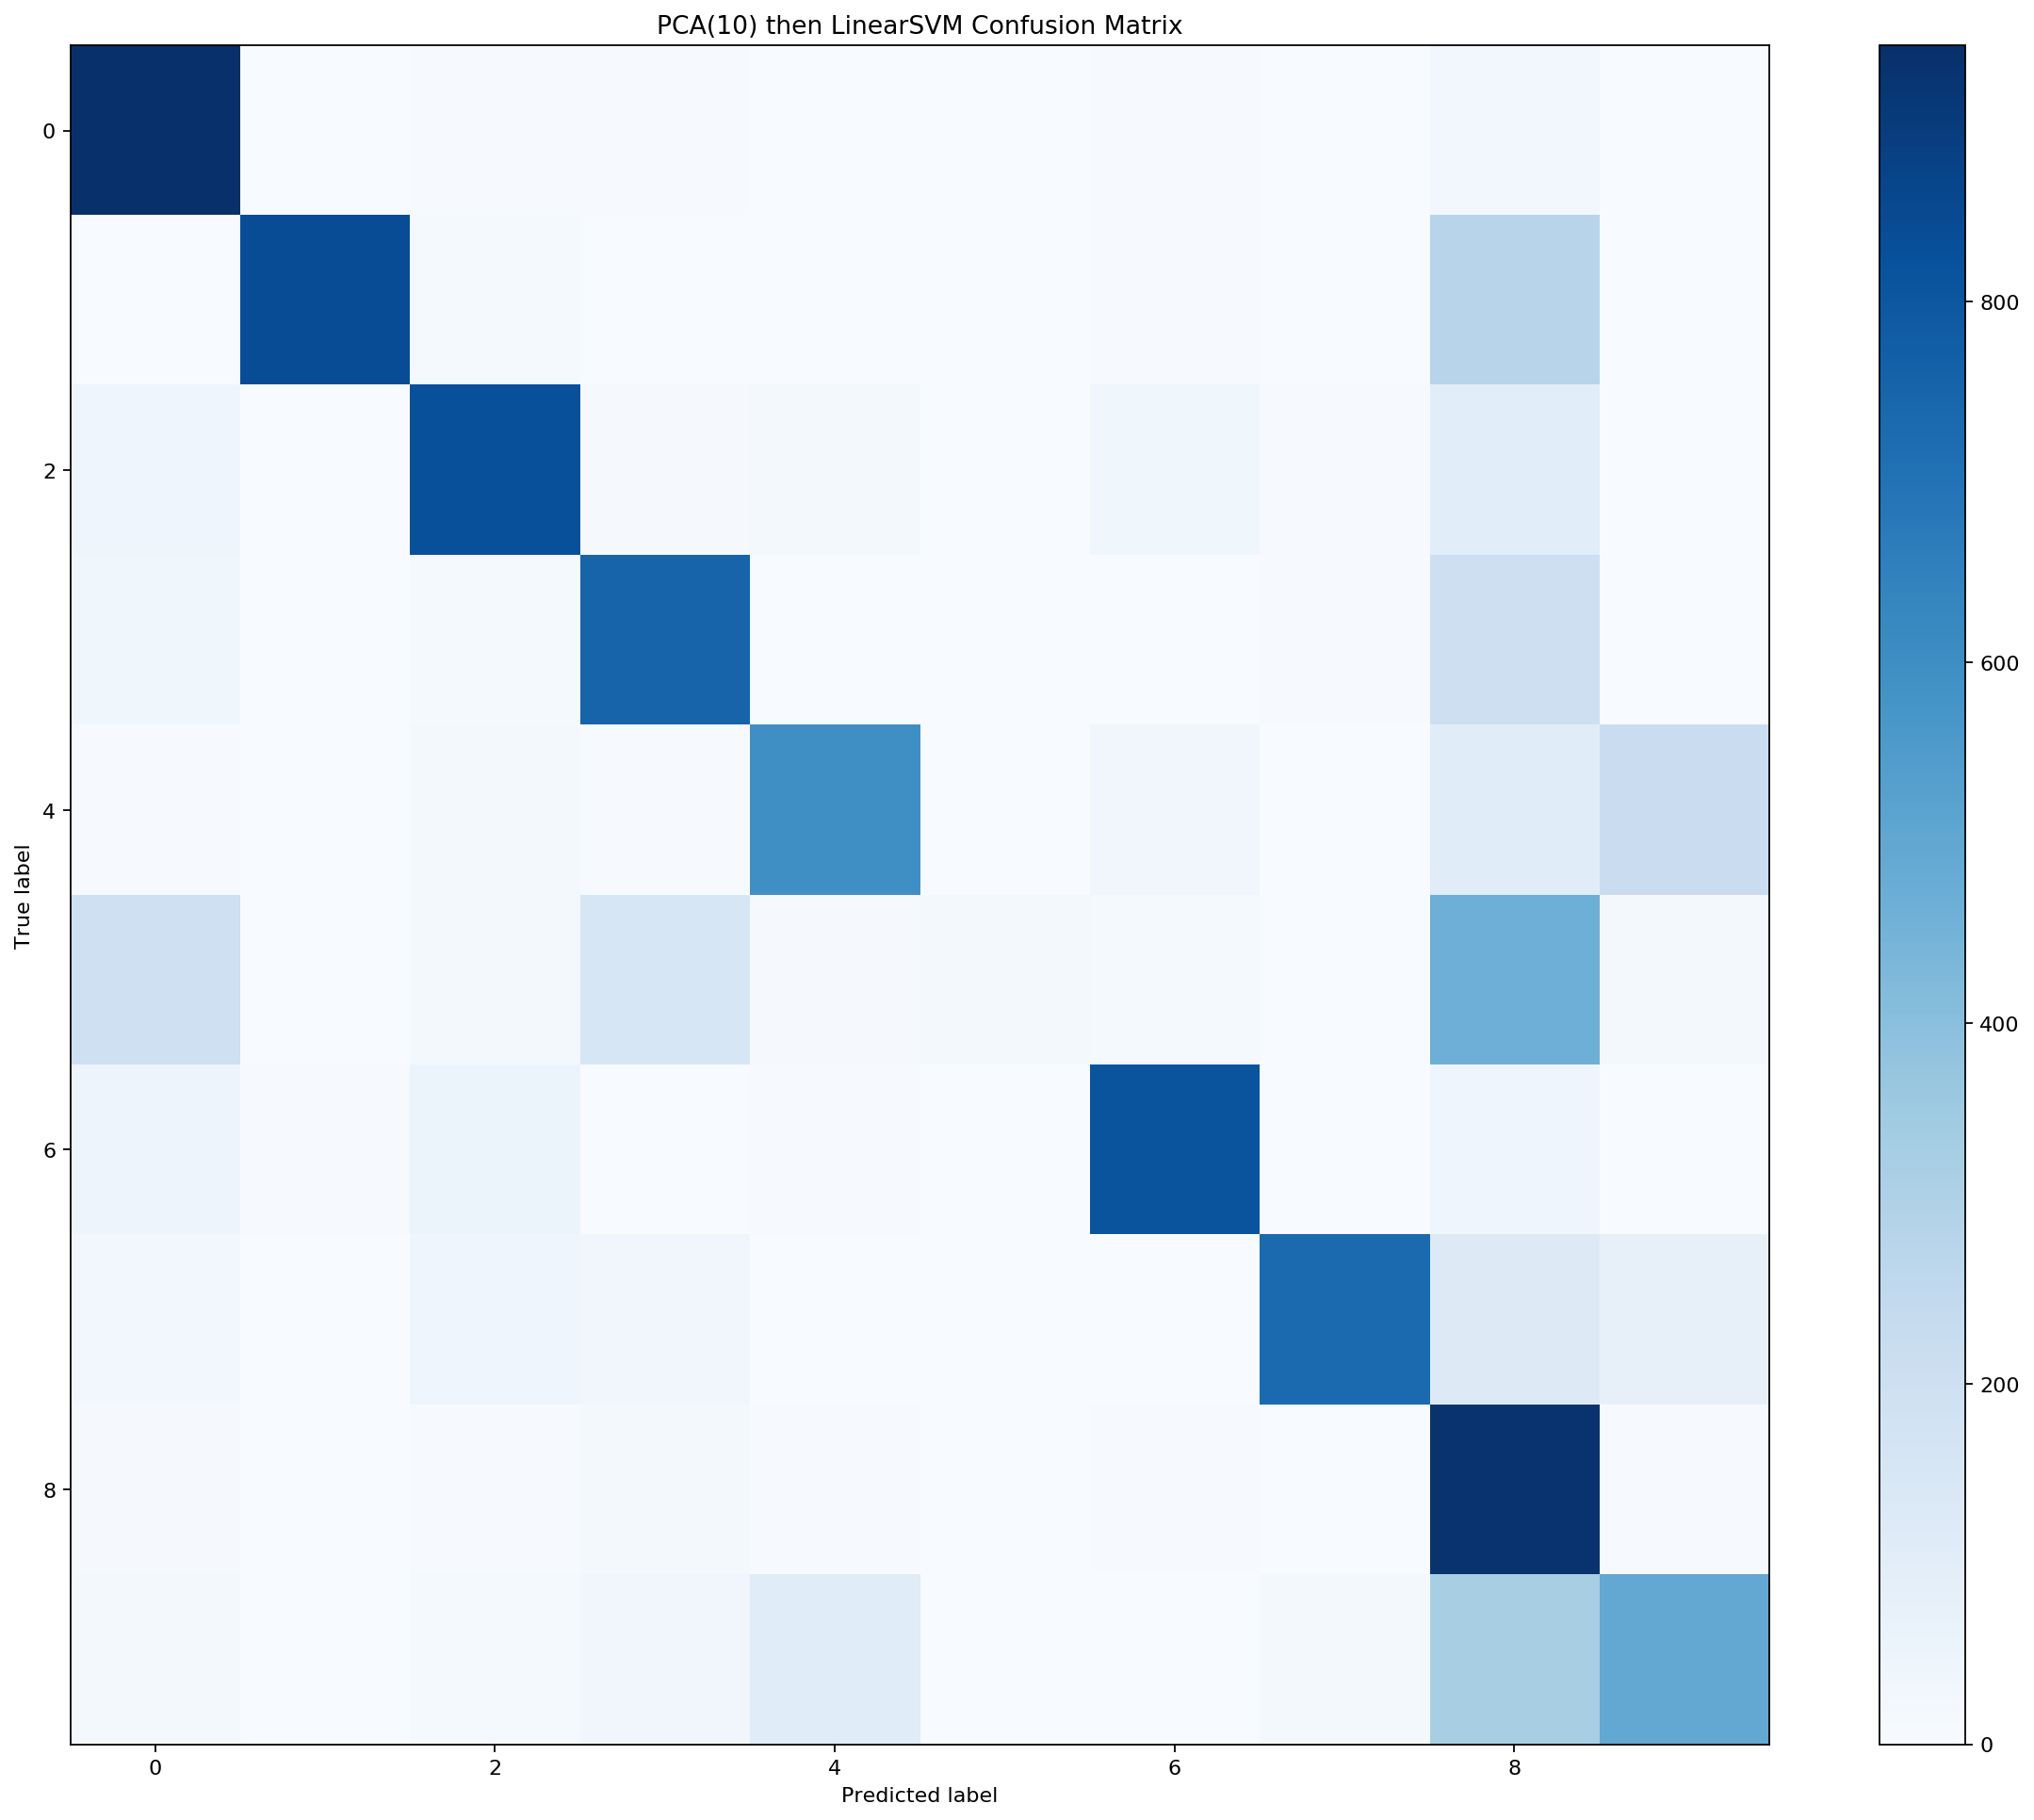

In [36]:
print("Classification report for classifier %s:\n%s\n" % (clf_faster, metrics.classification_report(y_test, y_predicted)))
cm = metrics.confusion_matrix(y_test, y_predicted)
print("Confusion matrix:\n%s" % cm)

print("Accuracy={}".format(metrics.accuracy_score(y_test, y_predicted)))
plot_confusion_matrix(cm, title='PCA(10) then LinearSVM Confusion Matrix')

# 4- Advanced hyperparameters tuning: GridSearch

In [37]:
from sklearn.model_selection import GridSearchCV
# We test multiple Gamma and C values:
# gamma_range = np.outer(np.logspace(-3, 0, 4),np.array([1,5])).flatten()
gamma_range = np.outer(np.logspace(-3, 1, 3),np.array([1])).flatten()
gamma_range

array([1.e-03, 1.e-01, 1.e+01])

In [38]:
# We will test on multiple C parameters:
# C_range = np.outer(np.logspace(-3, 3, 7),np.array([1,2, 5]))
# C_range = np.outer(np.logspace(-1, 1, 3), np.array([1, 5])).flatten()
C_range = np.outer(np.logspace(-3, -1, 3), np.array([1])).flatten()
C_range

array([0.001, 0.01 , 0.1  ])

In [39]:
parameters = {'kernel':['linear'], 'C': C_range, 'gamma': gamma_range}
svm_clf = svm.SVC()
grid_clf = '** Add your code here **'
grid_clf

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'kernel': ['linear'], 'C': array([0.001, 0.01 , 0.1  ]), 'gamma': array([1.e-03, 1.e-01, 1.e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [ ]:
%time grid_clf.fit(x_train_small.reshape(-1, 28 * 28), y_train_small)

In [ ]:
best_clf = grid_clf.best_estimator_
print('Best hyperparameters founded are:')
grid_clf.best_params_

In [ ]:
y_predicted = best_clf.predict(x_test.reshape(-1, 28 * 28))

In [ ]:
scores = grid_clf.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))
scores

In [ ]:
def plot_param_space_heatmap(scores, C_range, gamma_range):
    """https://github.com/ksopyla/svm_mnist_digit_classification/blob/master/mnist_helpers.py#L52"""
    plt.figure(figsize=(8, 6))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.jet)
    plt.xlabel('gamma')
    plt.ylabel('C')
    plt.colorbar()
    plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
    plt.yticks(np.arange(len(C_range)), C_range)
    plt.title('Validation accuracy')
    plt.show()
plot_param_space_heatmap(scores, C_range, gamma_range)

In [ ]:
# Even easier: TPOT
# https://github.com/EpistasisLab/tpot
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2)

In [ ]:
tpot.fit(x_train.reshape(-1, 28 * 28), y_train)

In [ ]:
print(tpot.score(x_test.reshape(-1, 28 * 28), y_test))

# 5- More Machine Learning algorithms
- k-Nearest Neighbor
- Random Forest
- LogisticRegression
- XGBoost
- K-Means

# Going further
- [In-Depth: Support Vector Machines](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html), from the excellent [Jake VanderPlas' _Python Data Science Handbook_](https://jakevdp.github.io/PythonDataScienceHandbook/index.html)  

- [Hyperparameters and Model Validation](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html), from the excellent [Jake VanderPlas' _Python Data Science Handbook_](https://jakevdp.github.io/PythonDataScienceHandbook/index.html)  

- [In-Depth: Principal Component Analysis](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html), from the excellent [Jake VanderPlas' _Python Data Science Handbook_](https://jakevdp.github.io/PythonDataScienceHandbook/index.html)  

# Ressources  
- https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py  

- https://github.com/ksopyla/svm_mnist_digit_classification/blob/master/svm_mnist_classification.py  